# Step 0: Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Exploration

In [ ]:
# Einlesen
df = pd.DataFrame()
schuh1 = read_csv()
schuh2 = read_csv()
schuh3 = read_csv()
schuh4 = read_csv()
schuh5 = read_csv()
schuh6 = read_csv()

df = pd.concat([schuh1,schuh2,schuh3,schuh4,schuh5,schuh6])


# Unique Werte
df['col'].unique()
df['col'].nunique()
df['col'].value_counts()

# Filtern
df[(df['col']>2) & (df['col2'])==0]


# Drop
#   Temporär
df.drop('col',axis=1)
#   Dauerhaft
del df['col']


# Indizes ermitteln
df.columns #spalten
df.index #zeilen

# Sortieren
df.sort_values() #option by=, inplace= sortierung permanent anwenden


# Nullwerte ermitteln
df.isnull().sum()


# Balance / Histogramm
sns.countplot()
sns.distplot()

# Korrelation
df.corr()
sns.scatterplot(df['col1'], df['col2'])
sns.boxplot(df['col1'], df['col2'])
sns.pairplot()

#Statistiken. Mit [] auch pro Spalte...auch mit groupby möglich
df.describe()

# Anzahl pro Gruppe prüfen
sorted(df['col'].unique())
sns.countplot()





# Step 2: Feature Engineering

Fehlende Werte

In [ ]:
# Grundsätzliche Größe des df und Feature Anzahl
len(df)
df.shape

#Gleiche Spalten zusammenführen
df['union'] = df.apply(lambda x: x['col1'].union(x['col2']), axis=1)

# Anzahl leer pro Spalte...in prozent
df.isnull.sum()
df.isnull.sum()/len(df)*100

# Untersuchen...sind Ausprägungen zu viele: weg
# Jede Spalte eizeln betrachten und entscheiden
df['col'].nunique()
df['col'].value_counts()
df['col'].dropna().unique()

# Fehlende Num-Werte bereinigen

# Einfache Aggregation über alle Werte einer Spalte
df['A'].fillna(value=df['A'].mean())

# Pro Gruppe
avg = df.groupby('col').mean()['col2']

def check_nan(col2, col):
    if np.isnan(col2):
        return avg[col]
    else:
        return col2

df['col2'] = df.apply(lambda x: check_nan(x['col2'], x['col'], axis=1))


# Binary Spalte generieren
df['col_new'] = df['col'].apply(lambda x: 1 if x == 'Yes' else 0)



In [ ]:
# Kategorische Daten übersetzen -> Dummyvariablen

# Spalten zusammenfassen

df['col'] = df['col'].replace


# Aus String etwas auslesen...hier die letzten vier chars eines strings
# aus der spalte col
df['col'] = df['col'].apply[lambda x:int(x[-4:])]

# K-Nearest-Neighbor

In [ ]:
# KNN
#    Preprocess
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

#    Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'], test_size=0.33)

#    Start KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

#    Find K
def find_k(n):
    error_rate = []
    for i in range(1,n):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
        
    plt.figure(figsize=(12,4))
    plt.plot(range(1,40),error_rate, color='blue',marker='o',markersize=10)
    plt.title('Error Rate')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    
    return error_rate.index(min(error_rate))

k = find_k(40)
k

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)


print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test, predictions))



# Daumenregel bei Neuro_Netz: INput Layer hat so viele Neuronen wie Features ca.
# Wird ca. um die Hälfte reduziert pro Layer

# K Means Clustering

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

kmeans.fit(df.drop('Private',axis=1))
kmeans.labels_


# Pseudodaten generieren

In [28]:
df = pd.read_csv('../data.csv')
df_shoebrands = pd.read_csv('../shoe_brands.csv')
df_shoemodels = pd.read_csv('../shoe_models.csv')

In [29]:
df.head()

,gender,height,weight,exp,age,street_shoe_size,foot_len,foot_width,foot_family,foot_deform,...,overall_rating,rate_stiffness,shoe_vorspann,shoe_asymetry,shoe_downturn,shoe_closing_type,use_freq,climb_grade,use_location,use_style


In [30]:
df_shoebrands = df_shoebrands.drop(['status'],axis=1)
df_shoebrands = df_shoebrands.drop(['link'],axis=1)
df_shoebrands.head()

,brands
0,Black Diamond
1,Evolv
2,Five Ten
3,La Sportiva
4,Lowa


In [31]:
df_shoemodels.head()

,brand,model
0,La Sportiva,ARAGON
1,La Sportiva,ARAGON WOMAN
2,La Sportiva,COBRA
3,La Sportiva,COBRA 4.99
4,La Sportiva,COBRA ECO


In [9]:
def fill_data(df):
    new_line = {}
    
    brand = df_shoebrands.sample()['brands'].iloc[0]
    model = np.random.choice(df_shoemodels[df_shoemodels['brand'] == brand]['model'].tolist())
    
    foot_family = ['ägyptisch', 'römisch', 'griechisch']
    foot_deform = ['hallux', 'plattfuß', 'senkfuß', 'hohlfuß', 'knickfuß', 'spreizfuß']
    shoe_closing_type = ['schnürer', 'klett', 'slipper']
    
    new_line = {
        'gender' : np.random.randint(2),
        'height' : round(np.random.normal(loc=168,scale=25,size=1)[0],2),
        'weight' : round(np.random.normal(loc=75,scale=15,size=1)[0],2),
        'exp' : int(round(np.random.normal(loc=10,scale=1,size=1)[0],0)),
        'age' : int(round(np.random.normal(loc=32,scale=13,size=1)[0],0)),
        'street_shoe_size' : round(np.random.normal(loc=38,scale=3,size=1)[0],1),
        'foot_len' : round(np.random.normal(loc=28,scale=4,size=1)[0],1),
        'foot_width' : round(np.random.normal(loc=9,scale=2,size=1)[0],1),
        'foot_family' : np.random.choice(foot_family),
        'foot_deform' :  np.random.choice(foot_deform),
        'shoe_brand' : brand,
        'shoe_model' : model,
        'climb_shoe_size' : round(np.random.normal(loc=36,scale=3,size=1)[0],1),
        'favourite' : np.random.randint(2),
        'shoe_age' : int(round(np.random.normal(loc=4,scale=1,size=1)[0],0)),
        'rate_comfort' : int(round(np.random.normal(loc=3,scale=1,size=1)[0],0)),
        'rate_fit' : int(round(np.random.normal(loc=3,scale=1,size=1)[0],0)),
        'overall_rating' : int(round(np.random.normal(loc=3,scale=1,size=1)[0],0)),
        'rate_stiffness' : int(round(np.random.normal(loc=3,scale=1,size=1)[0],0)),
        'shoe_vorspann' : np.random.randint(2),
        'shoe_asymetry' : np.random.randint(2),
        'shoe_downturn' : np.random.randint(2),
        'shoe_closing_type' : np.random.choice(shoe_closing_type),
        'use_freq' : int(round(np.random.normal(loc=3,scale=1,size=1)[0],0)),
        'climb_grade' : int(round(np.random.normal(loc=3,scale=1,size=1)[0],0)),
        'use_location' : np.random.randint(3),
        'use_style' : np.random.randint(3)    
    }
    
    df = df.append(new_line, ignore_index=True)
    
    return df

In [32]:
for n in range (500):
    df = fill_data(df)

In [33]:
df.shape

(500, 27)

In [34]:
len(df)

500

In [35]:
df.head()

,gender,height,weight,exp,age,street_shoe_size,foot_len,foot_width,foot_family,foot_deform,...,overall_rating,rate_stiffness,shoe_vorspann,shoe_asymetry,shoe_downturn,shoe_closing_type,use_freq,climb_grade,use_location,use_style
0,0,176.87,66.04,10,32,40.1,24.9,9.4,römisch,senkfuß,...,4,3,0,0,1,klett,2,4,0,2
1,0,125.77,59.11,10,33,32.1,29.0,9.0,griechisch,knickfuß,...,5,3,0,0,0,slipper,2,3,1,1
2,1,172.37,97.20,9,46,37.5,26.9,9.9,griechisch,hallux,...,3,2,0,1,1,schnürer,2,3,2,1
3,0,179.56,99.70,10,29,37.9,25.1,7.9,ägyptisch,senkfuß,...,2,2,0,1,0,schnürer,4,0,2,1
4,0,197.36,75.90,10,34,38.2,26.9,10.4,römisch,plattfuß,...,3,3,1,1,1,slipper,3,4,1,0


In [36]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
height,500.0,167.08664,25.709341,75.64,151.075,167.59,182.800,252.66
weight,500.0,76.38386,14.353530,39.97,66.130,76.25,86.000,115.38
street_shoe_size,500.0,37.81240,2.889496,29.50,35.900,37.80,39.800,47.50
foot_len,500.0,28.23060,3.832579,13.80,25.600,28.30,30.825,42.40
foot_width,500.0,9.04800,2.144270,2.80,7.600,9.00,10.400,16.30
climb_shoe_size,500.0,36.10240,2.971810,26.80,34.100,36.00,37.925,45.00


<AxesSubplot:xlabel='foot_family', ylabel='count'>

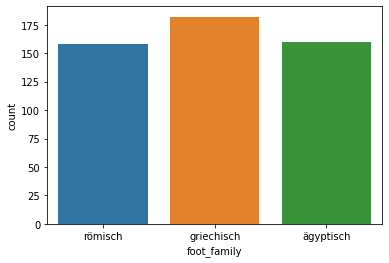

In [37]:
sns.countplot(x='foot_family', data=df)

<AxesSubplot:xlabel='shoe_brand', ylabel='count'>

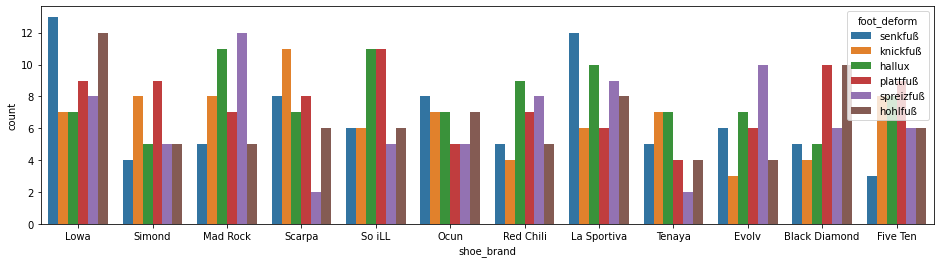

In [38]:
plt.figure(figsize=(16,4))
sns.countplot(x='shoe_brand', data=df, hue='foot_deform')

<AxesSubplot:>

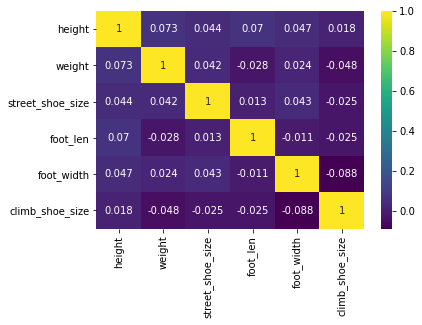

In [39]:
sns.heatmap(df.corr(),annot=True, cmap='viridis')

<AxesSubplot:xlabel='climb_shoe_size', ylabel='weight'>

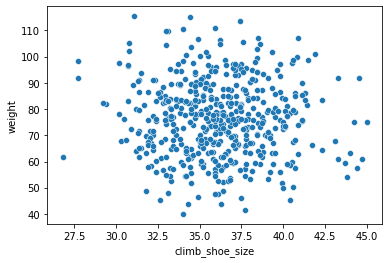

In [40]:
sns.scatterplot(x='climb_shoe_size', y='weight', data=df)

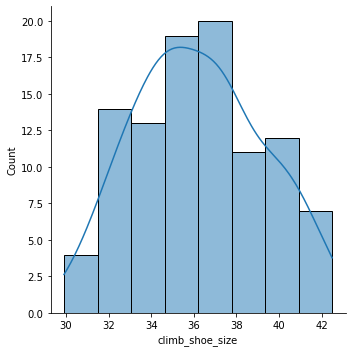

In [27]:
sns.displot(df['climb_shoe_size'], kde=True)